## Ruben Abbou
## Broken Line Interpolation Error Analysis

We will approximate $f(x) = \sin(x)$ on $\left[0, \frac{\pi}{2}\right]$ using the following Lagrange interpolation formula:
$$ S(x) = f(x_0) \cdot \frac{x-x_1}{x_0-x_1} +  f(x_1) \cdot \frac{x-x_0}{x_1-x_0}$$

The interpolation is done with a stepsize of $\frac{\pi}{2}\cdot \frac{1}{100}$ over $x_i = i\cdot dx$ for $i = 1, \ldots, 100$.

In [1]:
from numpy import linspace, array, sin, pi
import matplotlib.pyplot as plt

In [2]:
S = lambda f, x0, x1, x: f(x0) * (x - x1) / (x0 - x1) + f(x1) * (x - x0) / (x1 - x0)

def plot_S(S, f, I, dx):
    '''
    Plots the error in the interpolation of sin(x)
    inputs:
        - S: interpolation function
        - f: function to interpolate
        - I: interval of x for which we would like to plot the error for
        - dx: step size
    '''
    i1, i2 = I
    assert type(i1) is int and type(i2) is int
    assert i1 <= 100 and i1 >= 0 and i2 <= 100 and i2 >= 0
    assert i2 > i1
        
    interpolation = [] # approximation of f
    true_f = [] # true values
    te = [] # maximum error
    pts = [] # full mesh
    for i in range(i1, i2):
        # boundaries 
        x0 = i*dx
        x1 = (i+1)*dx
        
        # make mesh
        mesh = linspace(x0, x1, 301)
        pts += list(mesh)
        
        # estimate linear interpolation on the mesh
        interpolation += list(S(f, x0, x1, mesh))
        
        # calculate max error
        true = f(mesh)
        true_f += list(true)
        te += list(true * dx ** 2 / 8)
        
    plt.plot(pts, array(true_f) - array(interpolation), 'b', label = 'error')
    plt.plot(pts, te, 'r', label='theoretical error')
    plt.xticks([pts[i] for i in range(len(pts)) if not (i)%300],
               ['x'+str(i) for i in range(i1, i2+1, 1)])
    plt.title(r'Error in interpolating $\sin(x)$ on $\left[0, \frac{\pi}{2}\right]$')
    plt.ylabel('error')
    plt.legend()
    plt.show()

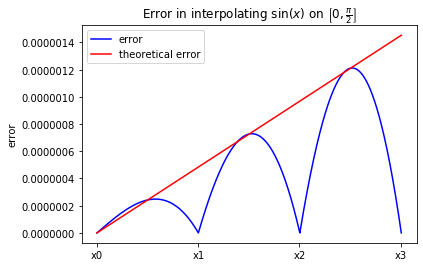

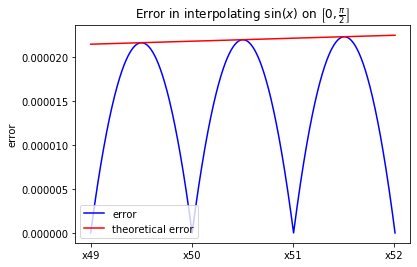

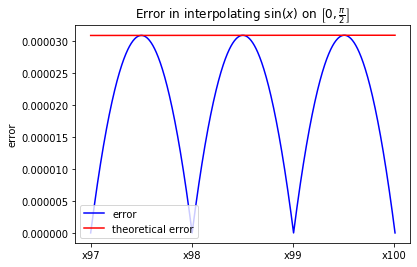

In [3]:
dx = (pi/2)/100

plot_S(S, sin, (0, 3), dx)
plot_S(S, sin, (49, 52), dx)
plot_S(S, sin, (97, 100), dx)